In [1]:
from utils import *
from mnist_tasks.mnist_loader import valid_set
from torch.utils.data import DataLoader, random_split

/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Compose(
    Grayscale(num_output_channels=3)
    ToTensor()
    Normalize(mean=[0.5], std=[0.5])
)
Train data set: 54000
Test data set: 10000
Valid data set: 6000
538


In [2]:
digits_to_store = [0,1]
MODE = "background"

spurious_p = 0.225
random_p = 1 - spurious_p

batch_size = 1280

store_dir = "/hdd2/dyah/coloredmnist_synthetic_spurious"
if not os.path.isdir(store_dir):
    os.makedirs(store_dir)

In [3]:
# define the spurious environment
spurious_env, spurious_colors = random_generator[MODE](digits_to_store, return_keys=True)
flip_map = generate_random_flip_map()
spurious_env_flip = flip_digit_color(flip_map, spurious_env)
random_color_keys = generate_uncorrelated_color_keys(n=5, forbidden_colors=spurious_colors)
print("random colors", random_color_keys)
print("spurious colors", spurious_colors)

FORBIDDEN SPURIOUS []
FORBIDDEN RANDOM ['gray', 'red']
random colors ['brown', 'blue', 'green', 'violet', 'yellow']
spurious colors ['gray', 'red']


In [4]:
# divide train and valid sets into 90-10 splits: 90 random color, 10 spurious color that will be flipped in test
# flip the 10% color for test set
val_rnd_size, val_spur_size = int(len(valid_set) * random_p), int(len(valid_set) * spurious_p)
val_rnd_set, val_spur_set = random_split(valid_set, [val_rnd_size, val_spur_size])
val_rnd_loader = DataLoader(val_rnd_set, batch_size=batch_size, shuffle=False)
val_spur_loader = DataLoader(val_spur_set, batch_size=batch_size, shuffle=False)

0it [00:00, ?it/s]/hdd2/dyah/sicheng_test/comnivore/libs/synthetic_colored_mnist/utils.py:40: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)
  imgs = imgs[mask,:,:,:]
/hdd2/dyah/sicheng_test/comnivore/libs/synthetic_colored_mnist/utils.py:41: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)
  labels = labels[mask]
4it [00:16,  4.14s/it]


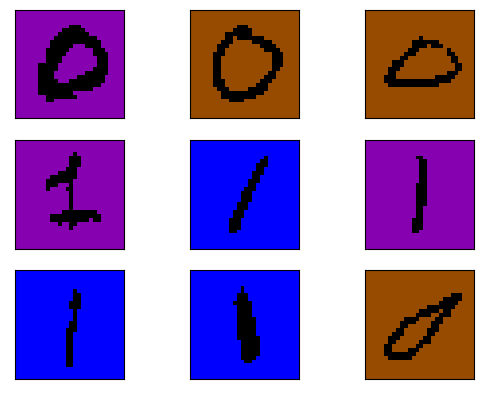

In [5]:
val_random_images, val_random_labels = transform_image_random(val_rnd_loader, possible_color_keys=random_color_keys)
show_random_images(val_random_images)

In [6]:
spurious_env

{0: array([0.50196078, 0.50196078, 0.50196078]), 1: array([1., 0., 0.])}

0it [00:00, ?it/s]/hdd2/dyah/sicheng_test/comnivore/libs/synthetic_colored_mnist/utils.py:25: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)
  imgs = imgs[mask,:,:,:]
/hdd2/dyah/sicheng_test/comnivore/libs/synthetic_colored_mnist/utils.py:26: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)
  labels = labels[mask]
/hdd2/dyah/sicheng_test/comnivore/libs/synthetic_colored_mnist/mnist_tasks/generate_color_mnist.py:71: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "transform_digit_color" failed type inference due to: non-precise type pyobject
During: typing of argument at /hdd2/dyah/sicheng_test/comnivore/libs/synthetic_colored_mnist/mnist_tasks/generate_color_mnist.py (73)

Fi

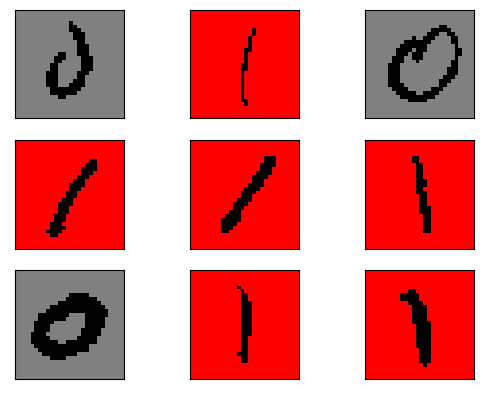

In [7]:
val_spur_images, val_spur_labels = transform_image_with_env(spurious_env, val_spur_loader)
show_random_images(val_spur_images)